---
# Crash Course Python for Data Science  - Intro to Pandas 
---
# 04 - Basic Visualizations
---



### Visualizing data speeds things up
You know the saying, "*a picture is worth a thousand words*?" That applies to the world of data science as well. Visualizations are arguably the best way to communicate your insights to others. Moreover, they can help you in your exploratory data analysis (EDA) by highlighting certain patterns in your data and surfacing outliers or errors. Depending on the type of data, you'll want to use different visualizations. For now, we'll focus on discrete and continuous data.   

**Discrete** basically means that it can only take specific values within a range. For example, if you recorded the gender of every person in this class, you'd have a discrete number of men or women. It would not make sense to say that "there are 1.98 men" or "20.2 women." But if you were to take everyone's height, that would be a **continuous** variable. Because you can have a student that's 5 feet and 11.322243 inches tall. Or a woman that is 5 feet and 4.902929930 inches tall. In other words, continuous data is not restricted to specific, separate values. 


Python has _plenty_ of data visualization libraries. We'll use **matplotlib** today.

### Begin by importing your tools

In [1]:
# Let's begin by importing pandas and matplotlib.
import pandas as pd
import matplotlib.pyplot as plt

# This is to style the plots the way I like them! Personal preference
# Funny note: ggplot is an R library that everyone loves, including me. So
# someone created a ggplot style for python graphs!

plt.style.use(style='ggplot') 
plt.rcParams['figure.figsize'] = (10, 6)

print('Libraries imported')

Libraries imported


## Reading in your data

In [3]:
# We use the pandas method pandas.read_csv("filepath") to create a DataFrame 
# and assign it to a variable:

df = pd.read_csv("https://raw.githubusercontent.com/axrd/datasets/master/tipdata.csv", usecols=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'])
df.to_csv(r'D:\01 Graduated Studen\MYCLASS\Undergraduate\ThirdTwo\data2.csv', index=False)
print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Histogram  
Histograms are best suited for visualizing *CONTINUOUS* data, one variable at a time. The x-axis shows the range of values being counted. The y-axis shows the frequency, or how often those values show up in our data.  


[Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

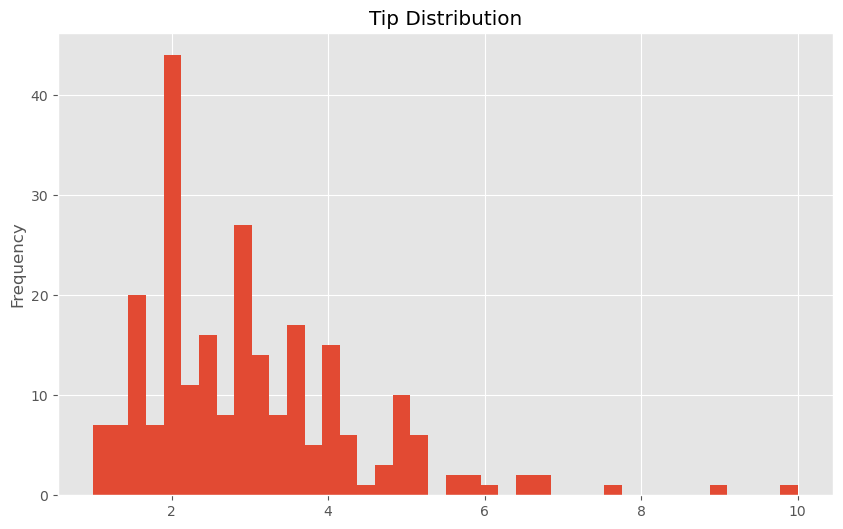

In [16]:
# Here's a great way to get an overview of our data:
df['tip'].plot(kind = 'hist', title='Tip Distribution', bins=40)
plt.show()

# We select a column/feature, chain the plot() method to it, and pass the string
# 'hist' to the plot method to specify a histogram. Finally, we call the show() 
# method to display the visualization. 

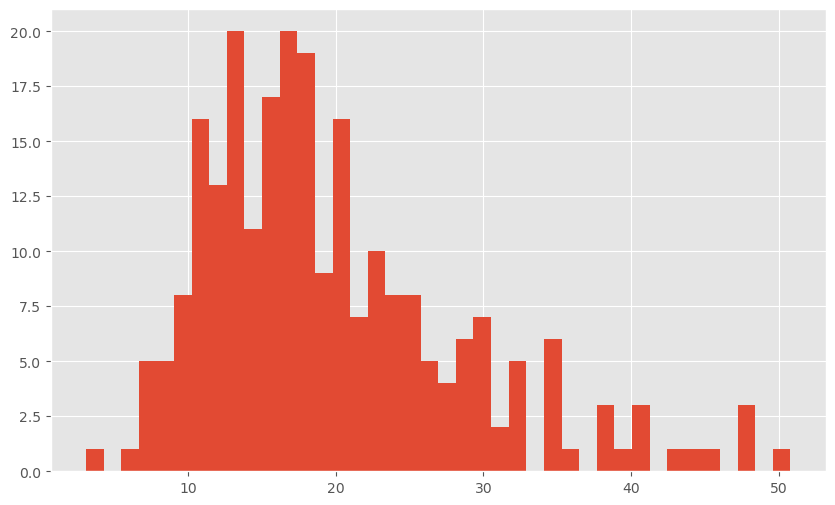

In [9]:
# Here's another way to do the same thing with a different feature/column:

df['total_bill'].hist(bins=40);

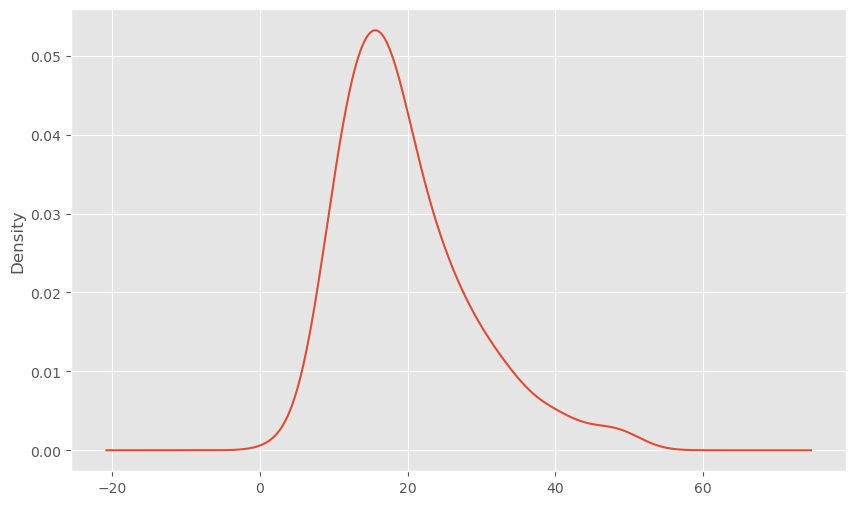

In [17]:
# Here's a differnet default plot called a density plot or KDE plot (kernel density estimation)
# Basically it smooths out a histogram and has an area under the curve of 1.

df['total_bill'].plot.density();

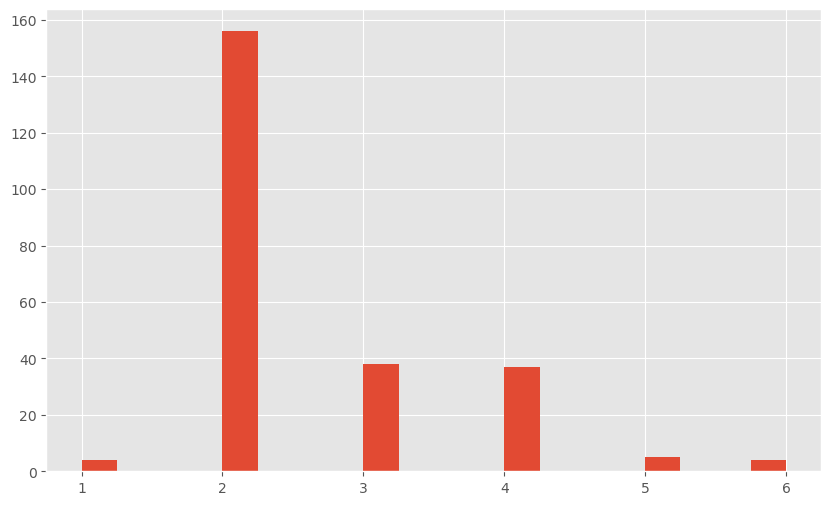

In [18]:
df['size'].hist(bins=20);

In [19]:
df['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

That looks a bit weird. The columns begin after (or before) the number ticks. That's because "size" is a discrete variable and histograms expect continuous values.

## Bar plot  
Useful for discrete data counts. 

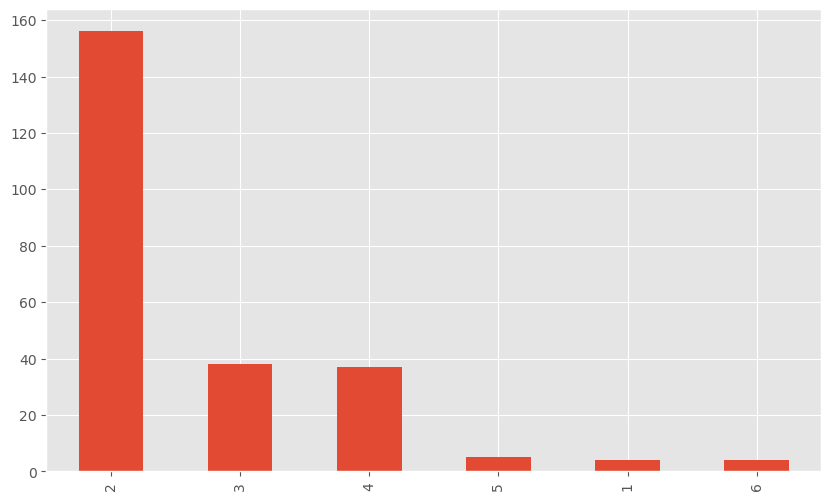

In [20]:
# Same as above, but using the correct visualization:
df['size'].value_counts().plot(kind='bar');

In [21]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

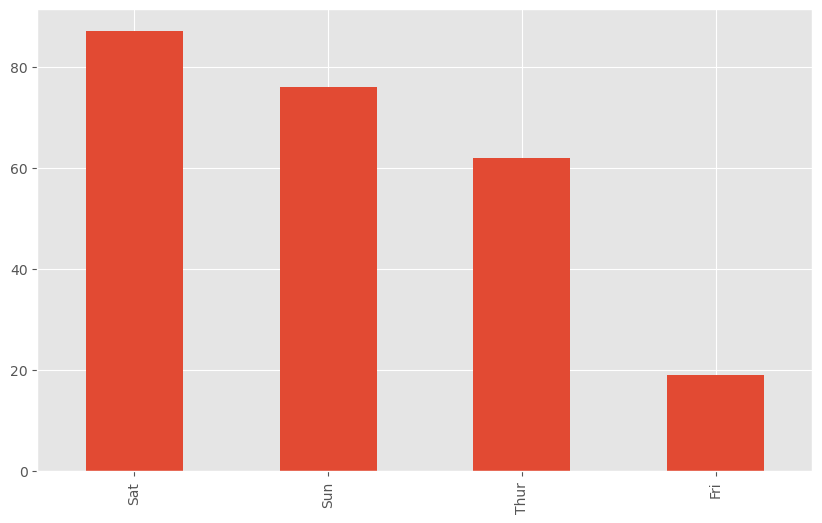

In [22]:
# Same thing, but for "day":
df['day'].value_counts().plot(kind='bar');

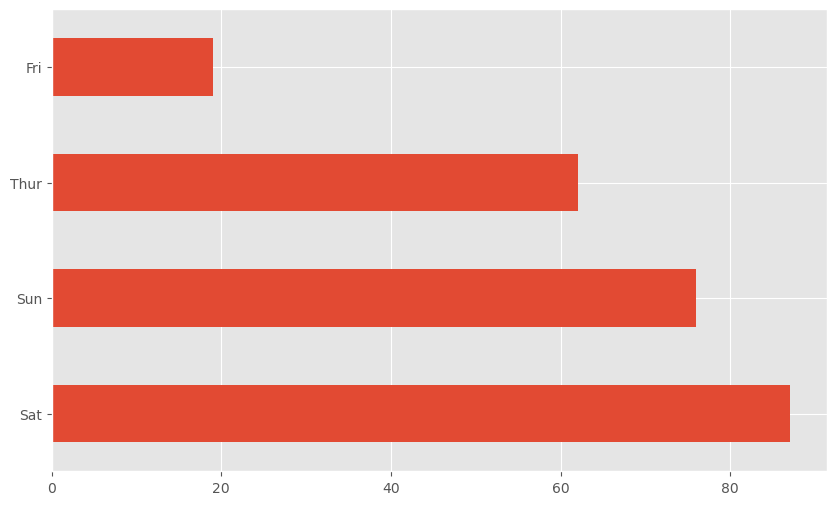

In [23]:
# If you fancy a horizontal view, "barh":
df['day'].value_counts().plot(kind='barh');

## Scatter plot  
Useful to visualize the relationship between two numeric variables.

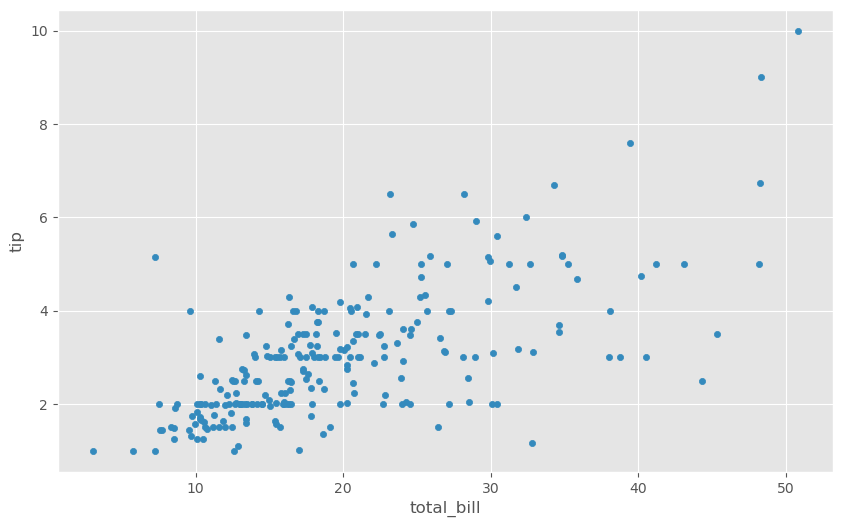

In [24]:
df.plot.scatter(x='total_bill', y='tip');

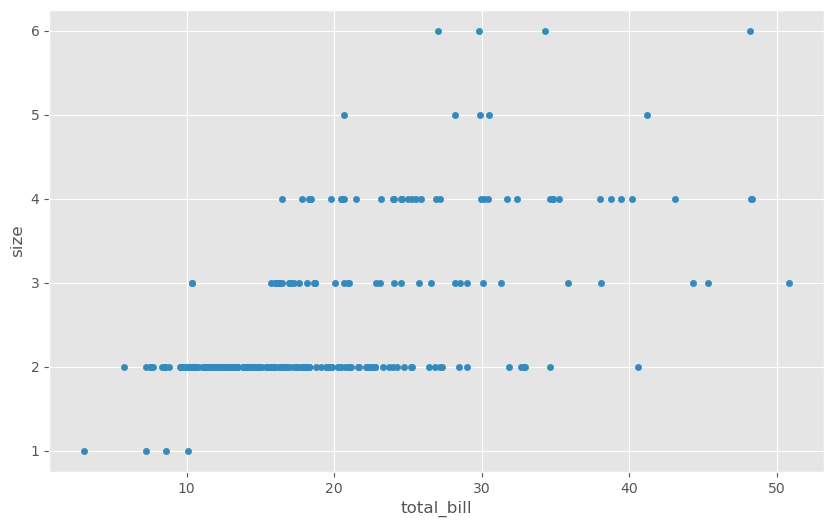

In [25]:
df.plot.scatter(x='total_bill', y='size');

As we'd imagine, the bigger the bill, the bigger the tip. 

## Boxplots  
Great way to find outliers (values that are really far from the rest of their type).

In [26]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


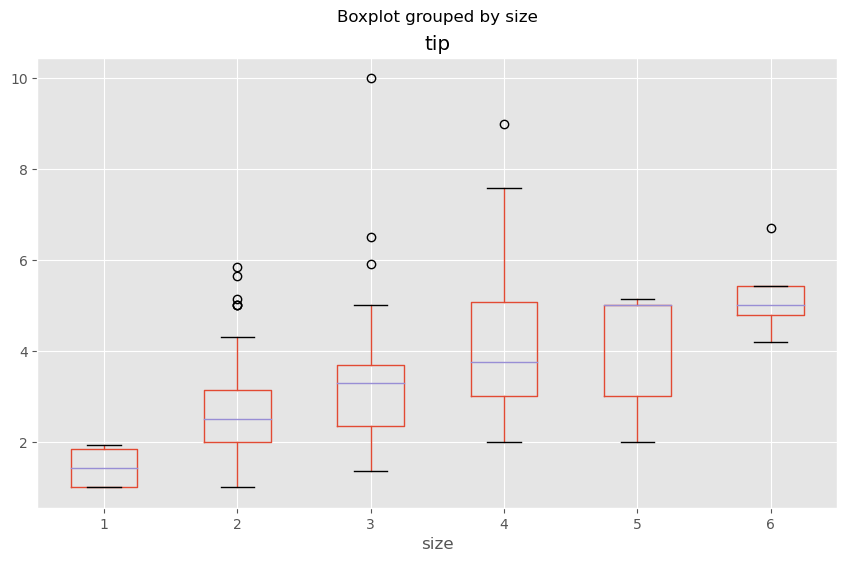

In [27]:
df.boxplot(column='tip', by='size')
plt.show()



---


## That was a quick one! 